In [14]:
import numpy as np
import astra
import tomopy
import matplotlib.pyplot as plt
import os, fnmatch
from os import listdir
from astropy.io import fits
%matplotlib notebook
from skimage import io

## In the first part I read the images and create the white beam  by summing all time bins 

In [2]:
rootpath = '/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/'
coll_dir = sorted(fnmatch.filter(listdir(rootpath),'Sample*'))
pathOB= "/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Flat1_Corrected/"


In [3]:
print(coll_dir)

['Sample_10090deg_Corrected', 'Sample_10099deg_Corrected', 'Sample_10108deg_Corrected', 'Sample_10117deg_Corrected', 'Sample_10126deg_Corrected', 'Sample_10135deg_Corrected', 'Sample_10144deg_Corrected', 'Sample_10153deg_Corrected', 'Sample_10162deg_Corrected', 'Sample_10171deg_Corrected', 'Sample_10180deg_Corrected']


In [4]:
proj = np.zeros([11,512,512])
print(np.shape(proj))

(11, 512, 512)


In [5]:
# read projs, create summed Img and put it in the proj

In [6]:
coll_files=[]
for i in range(0, len(coll_dir)):
# for i in range(0, 1):
    pathdata = rootpath + coll_dir[i]
    print(pathdata)
    coll_files.append(sorted(fnmatch.filter(listdir(pathdata),'*.fits')))

obfiles = fnmatch.filter(listdir(pathOB),'*.fits') # here there are several OB folders
coll_ob = sorted(obfiles)

/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10090deg_Corrected
/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10099deg_Corrected
/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10108deg_Corrected
/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10117deg_Corrected
/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10126deg_Corrected
/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10135deg_Corrected
/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10144deg_Corrected
/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10153deg_Corrected
/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10162deg_Corrected
/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10171deg_Corrected
/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Sample_10180deg_Corrected


In [7]:

for i in range(0, len(coll_files)):
    curr_img = np.zeros([512,512])
    for j in range(0, len(coll_files[i])):
        name = rootpath + coll_dir[i]+'/'+coll_files[i][j]
        with fits.open(name) as f:
            curr_img += f[0].data
    proj[i]=curr_img

In [8]:
print(len(coll_files))
print(len(coll_files[0]))
print(np.shape(proj))

11
2451
(11, 512, 512)


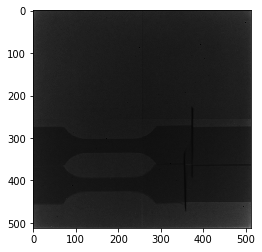

In [9]:
plt.figure()
plt.imshow(proj[0],cmap='gray')

In [10]:
for i in range(0, len(proj)):
    proj[i] = np.rot90(proj[i])

<IPython.core.display.Javascript object>


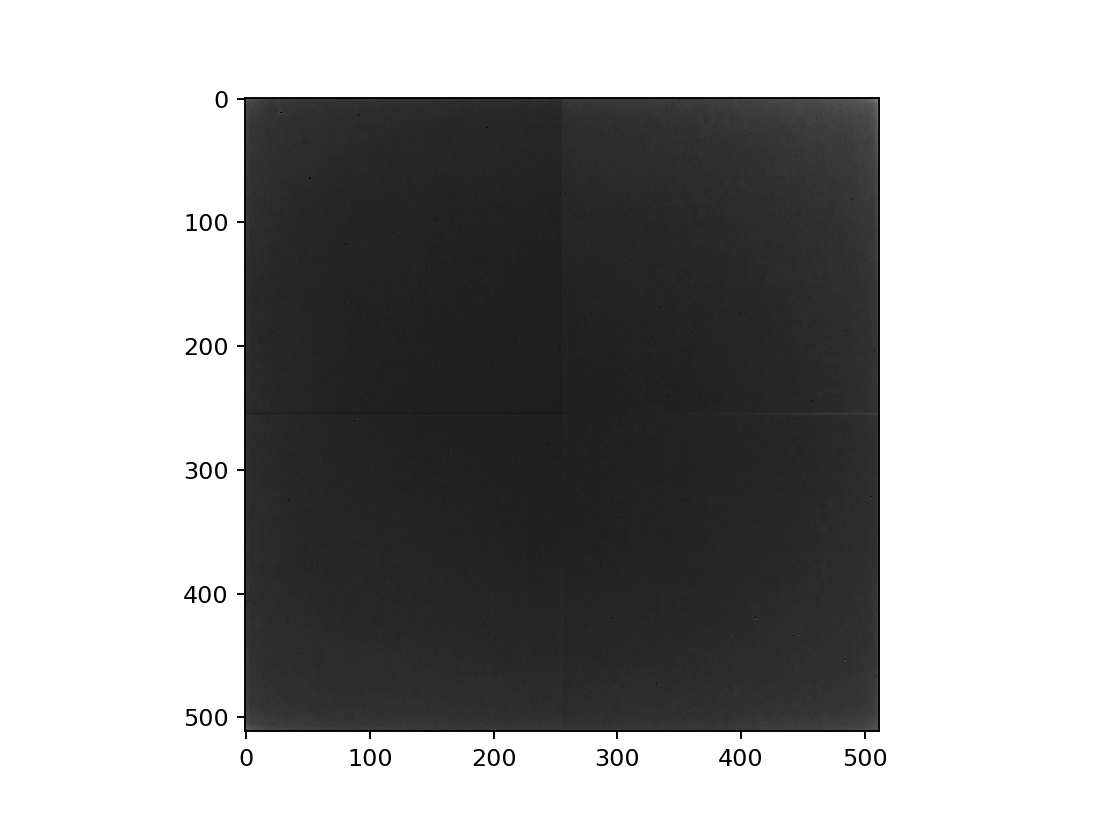

In [36]:
savepath = '/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Summed_imgs/'
curr_ob = np.zeros([512,512])

for i in range(0, len(coll_ob)):
    name = pathOB +coll_ob[i]
    with fits.open(name) as f:
        curr_ob += f[0].data
        
curr_ob = np.rot90(curr_ob)
plt.figure()
plt.imshow(curr_ob,cmap='gray')
fits.writeto(savepath+'Summed_ob.fits',curr_ob.astype(float))

In [38]:

print(coll_dir[0])
for i in range(0, len(proj)):
    proj[i][:,:] = proj[i][:,:].astype(float)
#     io.imsave(savepath+'Summed_img_'+coll_dir[i]+'.tif', proj[i][:,:].astype(float))
    fits.writeto(savepath+'Summed_img_'+str(i).zfill(4)+'.fits', proj[i][:,:].astype(float))
    



Sample_10090deg_Corrected


## Second part, I read the summed images that were processed in KipTool and ImageJ and try now to reconstruct.. 

In [40]:
# here I read the processed datasets with KipTool, lognorm + outliers removal in ImageJ

path_processed = '/media/carminati_c/Data2/IMAT_Nov2018/03_VerticalSetting_3hruns/Summed_Imgs_LogNorm_Cleaned/'
myfiles = sorted(fnmatch.filter(listdir(path_processed),'*.tif'))
print(myfiles)

['Summed_Imgs_LogNorm_Cleaned_0000.tif', 'Summed_Imgs_LogNorm_Cleaned_0001.tif', 'Summed_Imgs_LogNorm_Cleaned_0002.tif', 'Summed_Imgs_LogNorm_Cleaned_0003.tif', 'Summed_Imgs_LogNorm_Cleaned_0004.tif', 'Summed_Imgs_LogNorm_Cleaned_0005.tif', 'Summed_Imgs_LogNorm_Cleaned_0006.tif', 'Summed_Imgs_LogNorm_Cleaned_0007.tif', 'Summed_Imgs_LogNorm_Cleaned_0008.tif', 'Summed_Imgs_LogNorm_Cleaned_0009.tif', 'Summed_Imgs_LogNorm_Cleaned_0010.tif']


In [42]:
myproj=np.zeros([11,481,348])
for i in range(0, len(myfiles)):
    myproj[i][:,:] = io.imread(path_processed+myfiles[i])

In [49]:
theta=tomopy.angles(11, 90)
print(theta)

[1.57079633 1.72787596 1.88495559 2.04203522 2.19911486 2.35619449
 2.51327412 2.67035376 2.82743339 2.98451302 3.14159265]


In [68]:
rec_sart = tomopy.recon(myproj/(11*0.0055), theta, algorithm=tomopy.astra,
       options={'method':'SART', 'num_iter':10*180,
       'proj_type':'linear',
       'extra_options':{'MinConstraint':0}})

In [56]:
print(np.shape(rec_sart))

(481, 348, 348)


<IPython.core.display.Javascript object>


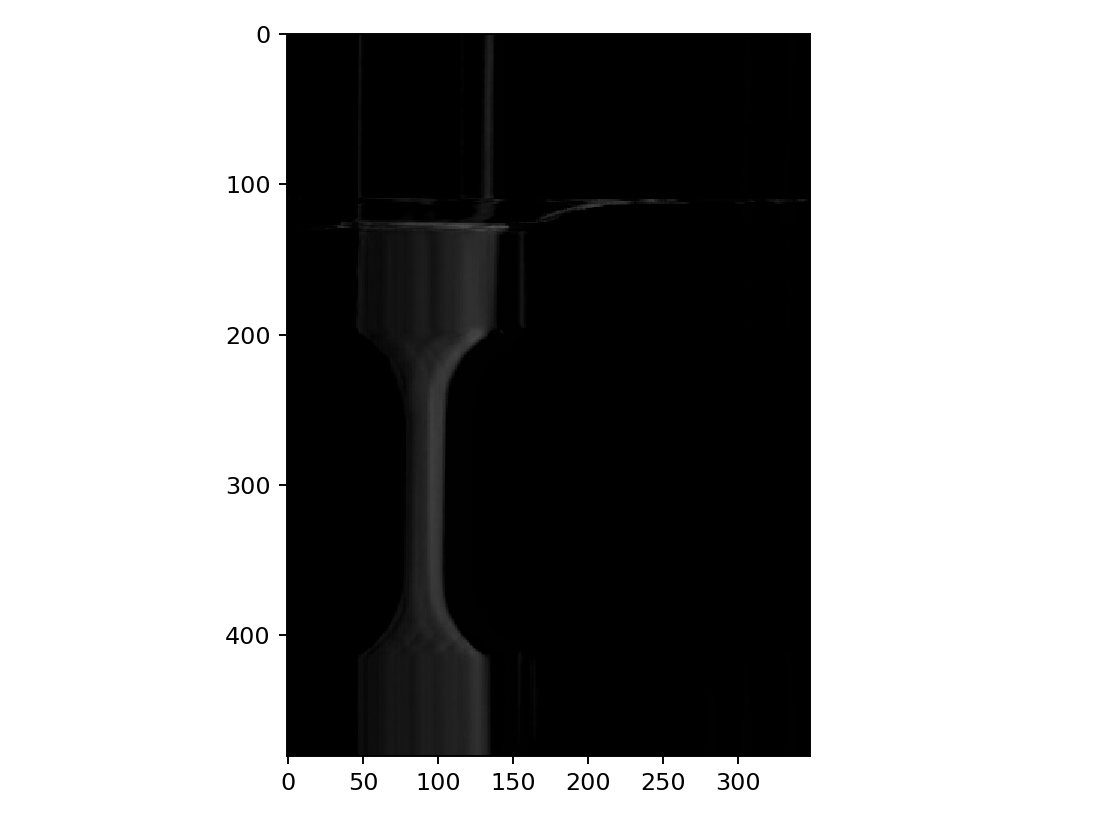

In [76]:
io.imshow(rec_sart[:,:,100], cmap='gray')

In [71]:
recon_gridrec = tomopy.recon(myproj/(11*0.0055),theta, algorithm='gridrec')

<IPython.core.display.Javascript object>


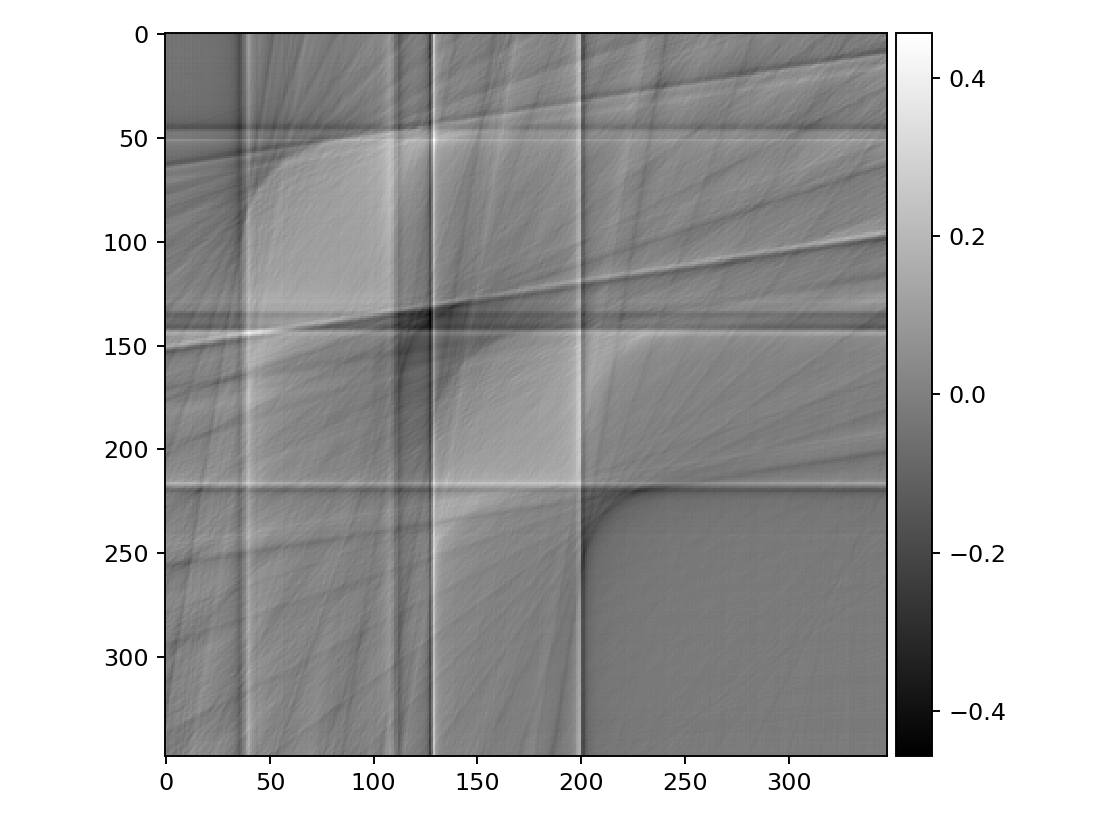

In [72]:
io.imshow(recon_gridrec[200,:,:], cmap='gray')